In [174]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
!pip install hvplot
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [175]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [176]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [177]:
df_market_data.shape

(41, 7)

In [178]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)
df_market_data


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


---

### Prepare the Data

In [179]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']]
)
# 'PC1','PC2'
#df_market_data_scaled = scaler.fit_transform(df_market_data[numerical_columns])

In [180]:
#numerical_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns.tolist()


#scaled_data = scaler.fit_transform(df_market_data[numerical_columns])

# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(
    market_data_scaled,
    columns=[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']]
)
# Copy the crypto names from the original DataFrame
df_market_scaled ["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_market_scaled.set_index("coin_id", inplace=True)

# Display the scaled DataFrame
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
"(bitcoin,)",0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
"(ethereum,)",0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
"(tether,)",0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
"(ripple,)",-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
"(bitcoin-cash,)",1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [181]:
#df_market_data_scaled = scaler.fit_transform(df_market_data[numerical_columns])

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [182]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,11))

In [183]:
# Create an empty list to store the inertia values

inertia = []
# Create a for loop to compute the inertia with each possible value of k
#elbow_data ={
    #'k' : k_values, 
    #'inertia' : inertia
#}
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_scaled)
    
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

In [184]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k' : k_values,
    'inertia' : inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

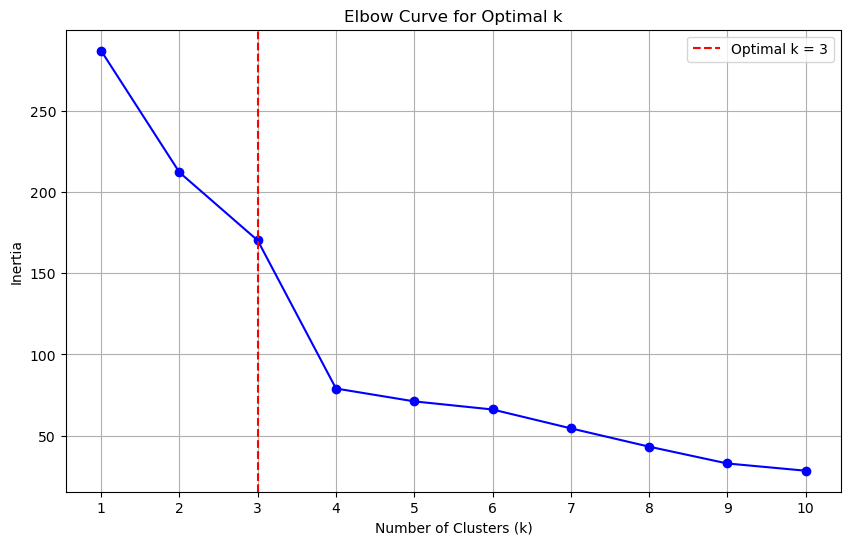

In [185]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow_pca['k'])  
plt.grid(True)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal k = 3') 
plt.legend()
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
k=3

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [186]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3)

In [187]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_scaled)

KMeans(n_clusters=3)

In [188]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions_df = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(predictions_df)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [189]:
# Create a copy of the scaled DataFrame
Crypto_df = df_market_scaled.copy()


In [190]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
Crypto_df["predicted_clusters"] = predictions_df

print(predictions_df)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [191]:

# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
Crypto_df = Crypto_df.hvplot.scatter(
    x="price_change_percentage_24h",  
    y="price_change_percentage_7d",   
    by="predicted_clusters",         
    hover_cols="coin_id",
    xticks=k,         
    title="Cryptocurrency Price Changes- k=3" 
)

# Display the scatter plot
Crypto_df

DataError: Having a non-string as a column name in a DataFrame is not supported.

---

### Optimize Clusters with Principal Component Analysis.

In [192]:
# Load the data into a Pandas DataFrame
market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [193]:

from sklearn.decomposition import PCA
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)


In [194]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
df_market_data_pca = pca.fit_transform(df_market_data)

# View the scaled PCA data
print(df_market_data_pca.shape)
df_market_data_pca[:5]

(41, 3)


array([[-341.80096268,  -51.36677548,   12.52547089],
       [-249.42046633,   24.11754777,  -14.23146597],
       [-402.61472077, -118.71073742,   24.83839662],
       [-406.75243715,  -79.48728629,    1.56633057],
       [-382.42994789, -103.43195906,   16.75307273]])

In [195]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([9.76037313e-01, 2.30282949e-02, 7.48308214e-04])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The explained variance ratio you provided indicates how much information (variance) is captured by each principal component in the PCA analysis.

In your case, the values are as follows:

The first principal component explains approximately 97.60% of the variance.
The second principal component explains approximately 2.30% of the variance.
The third principal component explains approximately 0.07% of the variance.
This suggests that the first principal component captures the majority of the information in the dataset, while the subsequent components contribute significantly less. This information can help you decide how many principal components to retain for further analysis, typically focusing on those that explain a substantial amount of variance.

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [196]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id",
)

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [197]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [198]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_pca)
    inertia.append(k_model.inertia_)

In [199]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)


In [200]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [201]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    #columns=["PCA1", "PCA2"],
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [202]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=3, random_state=0)

In [203]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_market_data)

KMeans(n_clusters=3, random_state=0)

In [204]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predictions_df = kmeans_model.predict(df_market_data)

# Print the resulting array of cluster values.
print(predictions_df)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [205]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca = df_market_data.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data["predicted_clusters"] = predictions_df 




# Display the copy of the scaled PCA DataFrame
print(df_market_data)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                   1.08388                     7.60278   
ethereum                                  0.22392                    10.38134   
tether                                   -0.21173                     0.04935   
ripple                                   -0.37819                    -0.60926   
bitcoin-cash                              2.90585                    17.09717   
binancecoin                               2.10423                    12.85511   
chainlink                                -0.23935                    20.69459   
cardano                                   0.00322                    13.99302   
litecoin                                 -0.06341                     6.60221   
bitcoin-cash-sv                           0.92530                     3.29641   
crypto-com-chain            

In [206]:

df_market_data = df_market_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted_clusters",
    #hover_cols=["coin_id"],
    #title = "Scatter Plot by predicted_clusters"
)
print(df_market_data)

:NdOverlay   [predicted_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)


In [210]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
#df_elbow_pca_copy.hvplot.scatter(
    #x="PC1",
    #y="PC2",
    #by="predicted_clusters"
#)
df_market_data.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_clusters",
    hover_cols=["coin_id"],
    title = "Scatter Plot by predicted_clusters"
)
df_market_data

AttributeError: 'NdOverlay' object has no attribute 'hvplot'

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 